In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

from datetime import datetime
import matplotlib.dates as mdates
from pandas_datareader import data
%matplotlib inline

In [41]:
# instruments to download. We'll focus on Apple, Microsoft and S&P500
tickers = ['AAPL', 'MSFT', 'FB']

# define the interesting range
start_date = '2013-12-31'
today = datetime.today()
end_date = '2018-09-21'#'{}-{}-{}'.format(today.year, today.month, today.day)

# load data
panel_data_apple = data.DataReader(tickers[0], data_source='iex', start=start_date, end=end_date)
panel_data_msft = data.DataReader(tickers[1], data_source='iex', start=start_date, end=end_date)
panel_data_fb = data.DataReader(tickers[2], data_source='iex', start=start_date, end=end_date)

In [42]:
panel_data_apple.head() # we only have prices for the week days

,open,high,low,close,volume
date,,,,,
2013-12-31,72.9110,73.8464,72.8886,73.8122,55819372
2014-01-02,73.1096,73.2873,72.6282,72.7741,58791957
2014-01-03,72.7386,72.8491,71.1032,71.1756,98303870
2014-01-06,70.7112,71.9413,70.2046,71.5637,103359151
2014-01-07,71.6150,71.8308,70.7737,71.0516,79432766


In [43]:
panel_data_msft.head()

,open,high,low,close,volume
date,,,,,
2013-12-31,33.3077,33.4680,33.1448,33.3166,17505770
2014-01-02,33.2632,33.3077,33.0406,33.0940,30643745
2014-01-03,33.1296,33.1474,32.5953,32.8713,31134795
2014-01-06,32.8179,32.8535,32.1589,32.1767,43615035
2014-01-07,32.3504,32.4973,32.2479,32.4261,35924726


In [44]:
panel_data_fb.head()

,open,high,low,close,volume
date,,,,,
2013-12-31,54.12,54.86,53.91,54.649,43152127
2014-01-02,54.83,55.22,54.19,54.710,43257622
2014-01-03,55.02,55.65,54.53,54.557,38287706
2014-01-06,54.42,57.26,54.05,57.200,68974359
2014-01-07,57.70,58.55,57.22,57.920,77329009


In [45]:
# get close prices
close = pd.concat(
    objs=[panel_data_apple['close'], panel_data_msft['close'], panel_data_f['close']],
    keys=('AAPL', 'MSFT', 'FB'),
    axis=1
)
close.head()

,AAPL,MSFT,FB
date,,,
2013-12-31,73.8122,33.3166,54.649
2014-01-02,72.7741,33.0940,54.710
2014-01-03,71.1756,32.8713,54.557
2014-01-06,71.5637,32.1767,57.200
2014-01-07,71.0516,32.4261,57.920


In [46]:
# generate week days range
week_days = pd.date_range(start=start_date, end=end_date, freq='B')
close.index = pd.to_datetime(
    [
        datetime.strptime(str(item), '%Y-%m-%d') for item in close.index
    ]
)
# reindex our data so that the indices are our only-week-days
close = close.reindex(week_days, method='ffill')

In [47]:
close.describe()

,AAPL,MSFT,FB
count,1234.000000,1234.000000,1234.000000
mean,123.132799,58.334147,118.816728
std,36.174802,21.017666,41.948305
min,65.755300,31.152500,53.530000
25%,96.148900,42.044000,79.470000
50%,112.414300,51.249950,114.605000
75%,150.841475,70.738875,155.930000
max,228.360000,114.260000,217.500000


In [48]:
# calculate short (10 days) and long (30 days) moving averages of the closing price
close_appl = close.loc[:, 'AAPL']
short_mavg = close_appl.rolling(window=50).mean()
long_mavg = close_appl.rolling(window=200).mean()

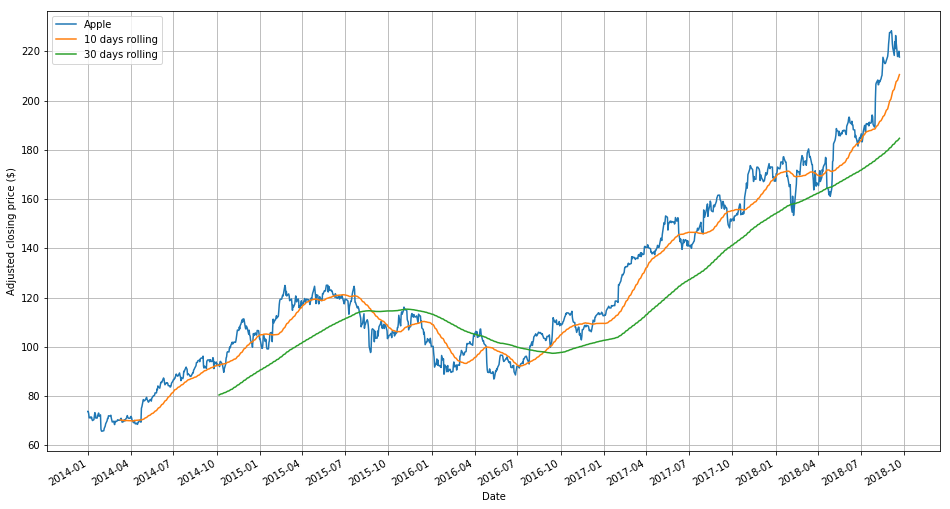

In [49]:
# plot everything
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(close_appl.index.to_pydatetime(), close_appl, label='Apple')
ax.plot(close_appl.index.to_pydatetime(), short_mavg, label='10 days rolling')
ax.plot(close_appl.index.to_pydatetime(), long_mavg, label='30 days rolling')
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_ylabel('Adjusted closing price ($)')
fig.autofmt_xdate()
ax.grid()
ax.legend(loc='best')

In [50]:
# Relative returns
relative_close = close.pct_change()
relative_close.head()

,AAPL,MSFT,FB
2013-12-31,NaN,NaN,NaN
2014-01-01,0.000000,0.000000,0.000000
2014-01-02,-0.014064,-0.006681,0.001116
2014-01-03,-0.021965,-0.006729,-0.002797
2014-01-06,0.005453,-0.021131,0.048445


In [51]:
relative_log_returns = np.log(close).diff()
relative_log_returns.head()

,AAPL,MSFT,FB
2013-12-31,NaN,NaN,NaN
2014-01-01,0.000000,0.000000,0.000000
2014-01-02,-0.014164,-0.006704,0.001116
2014-01-03,-0.022210,-0.006752,-0.002800
2014-01-06,0.005438,-0.021357,0.047308


# Cumulative log returns

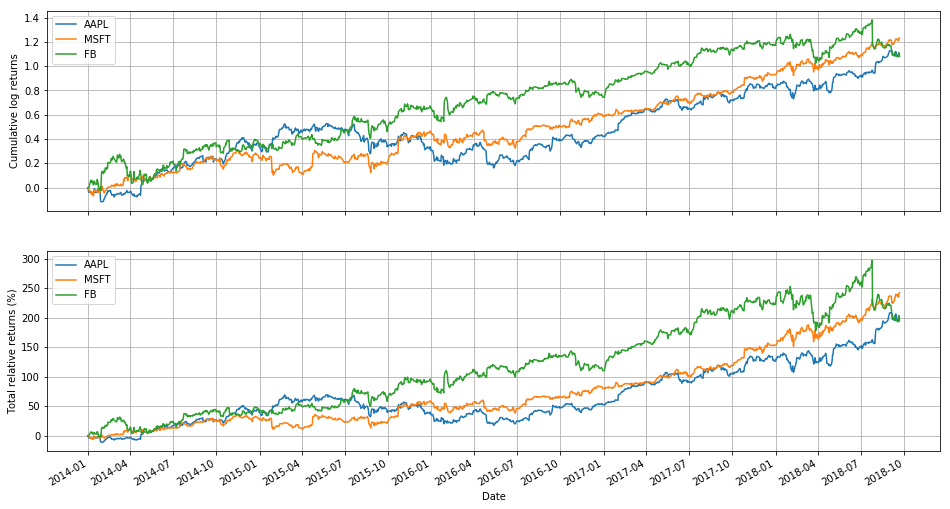

In [52]:
fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(16,9))

# cumsum sums everything till the pointing row
for equity in relative_log_returns:
    ax_1.plot(
        relative_log_returns[equity].index.to_pydatetime(), 
        relative_log_returns[equity].cumsum(), 
        label=str(equity)
    )
ax_1.set_ylabel('Cumulative log returns')
ax_1.set_xlabel('Date')
ax_1.grid()
ax_1.legend(loc='best')
ax_1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax_1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# log relative to relative can be expressed as e^(log_relative) - 1
for equity in relative_log_returns:
    ax_2.plot(
        relative_log_returns[equity].index.to_pydatetime(),
        100 * (np.exp(relative_log_returns[equity].cumsum()) - 1),
        label=str(equity)
    )
ax_2.set_ylabel('Total relative returns (%)')
ax_2.set_xlabel('Date')
ax_2.grid()
ax_2.legend(loc='best')
ax_2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax_2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

fig.autofmt_xdate()

In [53]:
# Last day returns. Make this a column vector
r_t = relative_log_returns.tail(1).transpose()
r_t

,2018-09-21 00:00:00
AAPL,-0.010830
MSFT,0.006057
FB,-0.018788


In [54]:
# weight the equities
weight_vec = pd.DataFrame(data=1/3, index=r_t.index, columns=r_t.columns)
weight_vec

,2018-09-21 00:00:00
AAPL,0.333333
MSFT,0.333333
FB,0.333333


In [55]:
# Total logreturn of the portfolio
portfolio_log_return = weight_vec.transpose().dot(r_t)
portfolio_log_return

,2018-09-21 00:00:00
2018-09-21,-0.007853


In [56]:
# Full analysis
weight_vec = pd.DataFrame(
    data=1/3,
    index=relative_log_returns.index.to_pydatetime(),
    columns=relative_log_returns.columns
)
weight_vec.head()

,AAPL,MSFT,FB
2013-12-31,0.333333,0.333333,0.333333
2014-01-01,0.333333,0.333333,0.333333
2014-01-02,0.333333,0.333333,0.333333
2014-01-03,0.333333,0.333333,0.333333
2014-01-06,0.333333,0.333333,0.333333


In [57]:
# we are only intrested in diagonal values
tmp_var = weight_vec.dot(relative_log_returns.transpose())
tmp_var.head().iloc[:, :5]

,2013-12-31 00:00:00,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-06 00:00:00
2013-12-31,NaN,0.0,-0.006584,-0.010588,0.010463
2014-01-01,NaN,0.0,-0.006584,-0.010588,0.010463
2014-01-02,NaN,0.0,-0.006584,-0.010588,0.010463
2014-01-03,NaN,0.0,-0.006584,-0.010588,0.010463
2014-01-06,NaN,0.0,-0.006584,-0.010588,0.010463


In [58]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(tmp_var), index=relative_log_returns.index)
portfolio_log_returns.tail()

2018-09-17   -0.016224
2018-09-18    0.003134
2018-09-19    0.001413
2018-09-20    0.014055
2018-09-21   -0.007853
Freq: B, dtype: float64

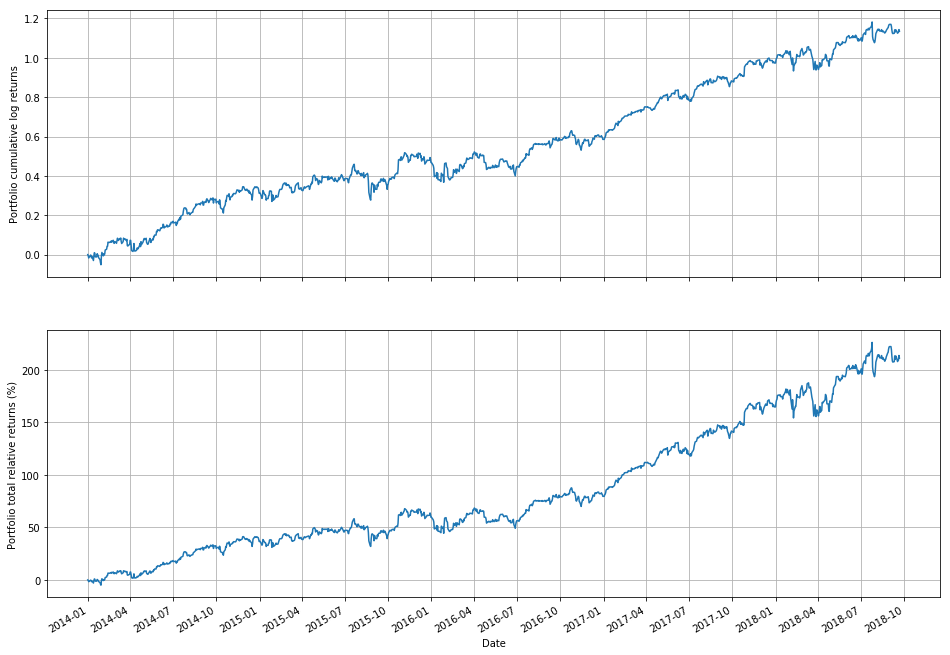

In [59]:
total_relative_returns = np.exp(portfolio_log_returns.cumsum()) - 1
fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(16,12))

ax_1.plot(portfolio_log_returns.index.to_pydatetime(), portfolio_log_returns.cumsum())
ax_1.set_ylabel('Portfolio cumulative log returns')
ax_1.set_xlabel('Date')
ax_1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax_1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_1.grid()

ax_2.plot(total_relative_returns.index.to_pydatetime(), 100 * total_relative_returns)
ax_2.set_ylabel('Portfolio total relative returns (%)')
ax_2.set_xlabel('Date')
ax_2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax_2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_2.grid()

fig.autofmt_xdate()

In [60]:
# Calculating the time-related parameters of the simulation
week_days_per_year = 260
days_in_simulation = total_relative_returns.shape[0]
num_of_years = days_in_simulation / week_days_per_year

# the last sample in total relative returns will give us the total portfolio return
total_portfolio_return = total_relative_returns.tail(1).values[0]
# Average portfolio return assuming compunding of returns
average_annual_return = (1 + total_portfolio_return) ** (1 / num_of_years) - 1

print('Total portfolio return is: {:5.2f}%'.format(100 * total_portfolio_return))
print('Average yearly return is: {:5.2f}%'.format(100 * average_annual_return))

Total portfolio return is: 211.24%
Average yearly return is: 27.03%


In [61]:
# calculate exponential moving average for a short window
short_ema = close.ewm(span=50, adjust=False).mean()
# take difference between the actual price and ema (in order to calculate cross-overs)
trading_positions = close - short_ema
trading_positions.tail()

,AAPL,MSFT,FB
2018-09-17,7.128969,4.339472,-16.423181
2018-09-18,7.195284,5.197336,-16.048154
2018-09-19,7.038018,3.542735,-12.767050
2018-09-20,8.356919,5.200471,-9.422460
2018-09-21,5.752138,5.659472,-12.021775


In [62]:
# take a positive weight when a sample is positive and the negative one when negative
trading_positions = trading_positions.apply(func=np.sign) * 1/3
trading_positions.head()

,AAPL,MSFT,FB
2013-12-31,0.000000,0.000000,0.000000
2014-01-01,0.000000,0.000000,0.000000
2014-01-02,-0.333333,-0.333333,0.333333
2014-01-03,-0.333333,-0.333333,-0.333333
2014-01-06,-0.333333,-0.333333,0.333333


In [63]:
# first day is an error since we know the price at THE END of it
# therefore, we have to shif it by 1
trading_positions_shifted = trading_positions.shift(periods=1)
trading_positions_shifted.head()

,AAPL,MSFT,FB
2013-12-31,NaN,NaN,NaN
2014-01-01,0.000000,0.000000,0.000000
2014-01-02,0.000000,0.000000,0.000000
2014-01-03,-0.333333,-0.333333,0.333333
2014-01-06,-0.333333,-0.333333,-0.333333


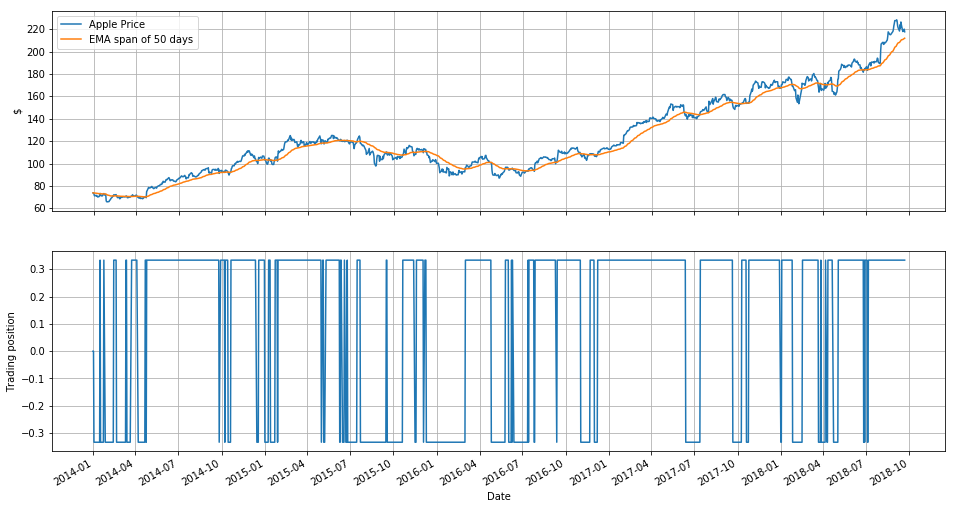

In [64]:
# Let's examine the trading assets for Apple
fig , (ax_1, ax_2) = plt.subplots(2, 1, figsize=(16, 9))

ax_1.plot(close.index.to_pydatetime(), close['AAPL'], label='Apple Price')
ax_1.plot(short_ema.index.to_pydatetime(), short_ema['AAPL'], label='EMA span of 50 days')
ax_1.set_ylabel('$')
ax_1.set_xlabel('Date')
ax_1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax_1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_1.legend(loc='best')
ax_1.grid()

ax_2.plot(trading_positions_shifted.index.to_pydatetime(), trading_positions_shifted['AAPL'])
ax_2.set_ylabel('Trading position')
ax_2.set_xlabel('Date')
ax_2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax_2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_2.grid()

fig.autofmt_xdate()

In [65]:
# calculate log daily increments
asset_log_returns = np.log(close).diff()
asset_log_returns.head()

,AAPL,MSFT,FB
2013-12-31,NaN,NaN,NaN
2014-01-01,0.000000,0.000000,0.000000
2014-01-02,-0.014164,-0.006704,0.001116
2014-01-03,-0.022210,-0.006752,-0.002800
2014-01-06,0.005438,-0.021357,0.047308


In [66]:
strategy_assets_log_returns = asset_log_returns * trading_positions_shifted
strategy_assets_log_returns.head()

,AAPL,MSFT,FB
2013-12-31,NaN,NaN,NaN
2014-01-01,0.000000,0.000000,0.000000
2014-01-02,-0.000000,-0.000000,0.000000
2014-01-03,0.007403,0.002251,-0.000933
2014-01-06,-0.001813,0.007119,-0.015769


In [67]:
# Get the cumulative log-returns per asset
cumulative_stategy_log_ret = strategy_assets_log_returns.cumsum()
# Transform to relative returns
relative_returns = np.exp(cumulative_stategy_log_ret) - 1

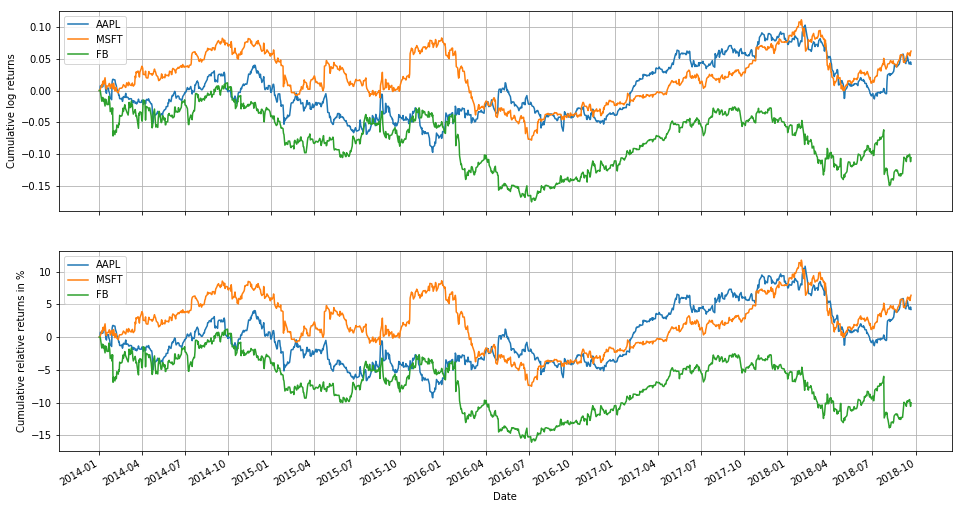

In [68]:
fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(16,9))

for equity in cumulative_stategy_log_ret:
    ax_1.plot(
        cumulative_stategy_log_ret.index.to_pydatetime(), 
        cumulative_stategy_log_ret[equity], 
        label=str(equity)
    )
ax_1.set_ylabel('Cumulative log returns')
ax_1.set_xlabel('Date')
ax_1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax_1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_1.legend(loc='best')
ax_1.grid()

for equity in relative_returns:
    ax_2.plot(
        relative_returns.index.to_pydatetime(),
        100 * relative_returns[equity],
        label=str(equity)
    )
ax_2.set_ylabel('Cumulative relative returns in %')
ax_2.set_xlabel('Date')
ax_2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax_2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax_2.legend(loc='best')
ax_2.grid()

fig.autofmt_xdate()

In [69]:
# Total strategy relative returns.
cumulative_relative_return = relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cumulative_log_relative_return = cumulative_stategy_log_ret.sum(axis=1)
cumulative_relative_return_approx = np.exp(cumulative_log_relative_return) - 1

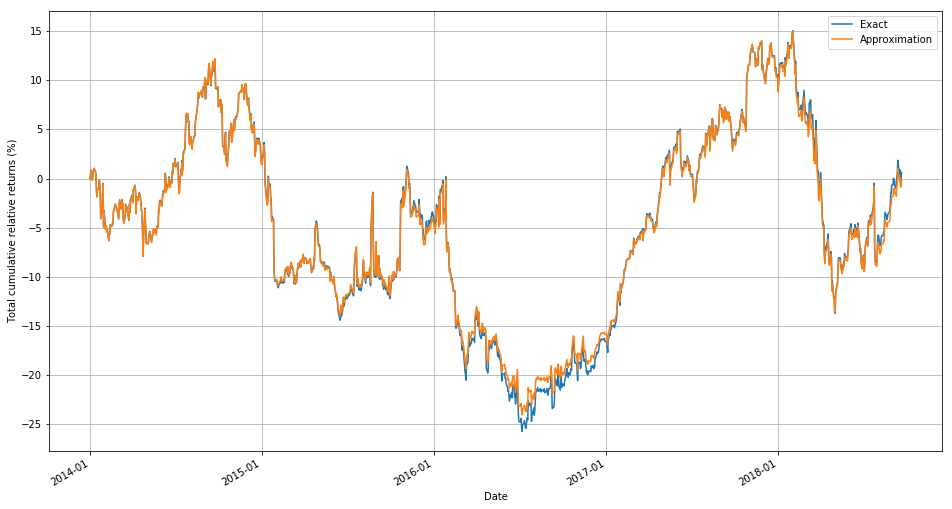

In [70]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cumulative_relative_return.index.to_pydatetime(), 100*cumulative_relative_return, label='Exact')
ax.plot(cumulative_relative_return_approx.index.to_pydatetime(), 100*cumulative_relative_return_approx, label='Approximation')
ax.set_xlabel('Date')
ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid()

fig.autofmt_xdate()

# Notice to remember
1. Log-returns can and should be added across time for a single asset to calculate cumulative return timeseries across time.
2. However, when summing (or averaging) log-returns across assets, care should be taken. Relative returns can be added, but log-returns only if we can safely assume they are a good-enough approximation of the relative returns.

In [71]:
num_of_days_in_analysis = cumulative_relative_return.shape[0]
num_of_years_in_analysis = num_of_days_in_analysis / week_days_per_year

# The last data point will give us the total portfolio return
total_portfolio_return = cumulative_relative_return[-1]
average_annual_return = (1 + total_portfolio_return)**(1 / num_of_years_in_analysis) - 1

print('Total portfolio return is: {:5.2f}%'.format(100 * total_portfolio_return))
print('Average yearly return is: {:5.2f}%'.format(100 * average_annual_return))

Total portfolio return is:  0.61%
Average yearly return is:  0.13%


# Compare strategies

In [72]:
# weights for the buy-and-hold strategy
matrix_of_weights = pd.DataFrame(data=1/3, index=close.index, columns=close.columns)
# get buy-and-gold strategy log-returns
simple_strategy_asset_log_returns = matrix_of_weights * asset_log_returns
cum_strategy_asset_log_returns = simple_strategy_asset_log_returns.cumsum()
cum_strategy_asset_relative_returns = np.exp(cum_strategy_asset_log_returns) - 1
# total strategy relative returns
total_strategy_relative_returns = cum_strategy_asset_relative_returns.sum(axis=1)
total_strategy_relative_returns.head()

2013-12-31         NaN
2014-01-01    0.000000
2014-01-02   -0.006570
2014-01-03   -0.017088
2014-01-06   -0.006472
Freq: B, dtype: float64

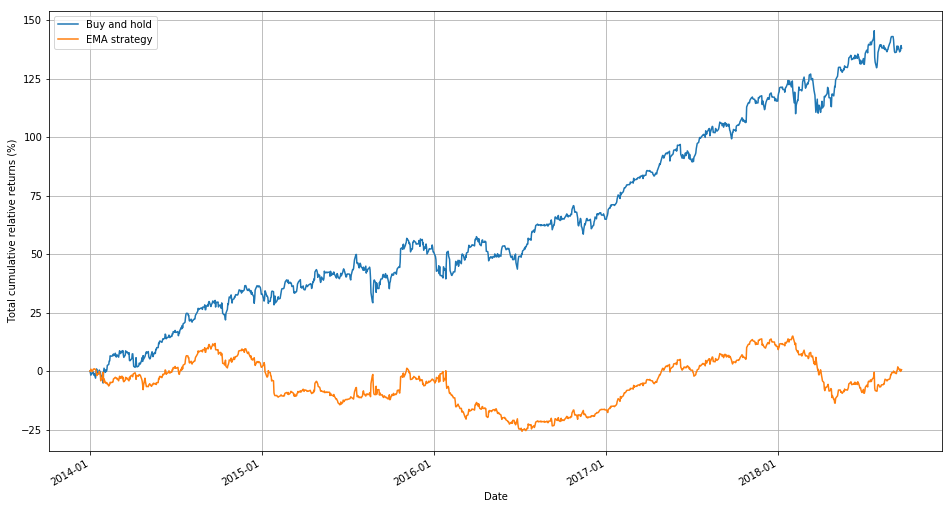

In [74]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(total_strategy_relative_returns.index.to_pydatetime(), 100*total_strategy_relative_returns, label='Buy and hold')
ax.plot(cumulative_relative_return.index.to_pydatetime(), 100*cumulative_relative_return, label='EMA strategy')
ax.set_xlabel('Date')
ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid()

fig.autofmt_xdate()